# CHOCO RATING OUTIER ANALYSIS WITH DBSCAN

## IMPORTING LIBRARIES 

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## LOADING DATASET

In [75]:
data=pd.read_csv("flavors_of_cacao.csv")
data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## DATA INSIGHTS

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [4]:
data.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [5]:
data.shape

(1795, 9)

## NULL VALUES

In [6]:
data.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [7]:
data.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [8]:
for col in data.columns:
    print(data[col].value_counts())

Soma                                       47
Bonnat                                     27
Fresco                                     26
Pralus                                     25
A. Morin                                   23
                                           ..
Chequessett                                 1
Heirloom Cacao Preservation (Manoa)         1
Raoul Boulanger                             1
Heirloom Cacao Preservation (Brasstown)     1
Heilemann                                   1
Name: Company \n(Maker-if known), Length: 416, dtype: int64
Madagascar                   57
Peru                         45
Ecuador                      42
Dominican Republic           37
Venezuela                    21
                             ..
Namau Village                 1
Monte Alegre, D. Badero       1
Alto Beni, Covendo Region     1
Medagla, Xoco                 1
Kpime                         1
Name: Specific Bean Origin\nor Bar Name, Length: 1039, dtype: int64
414     10
24 

In [9]:
data.iloc[:,:1].value_counts()

Company \n(Maker-if known)
Soma                          47
Bonnat                        27
Fresco                        26
Pralus                        25
A. Morin                      23
                              ..
Metropolitan                   1
Minimal                        1
Mita                           1
Monarque                       1
Marigold's Finest              1
Length: 416, dtype: int64

# DATA VISUALIZATION

In [10]:
Ratingpercocoa = data[["Cocoa\nPercent","Rating"]].groupby("Cocoa\nPercent").sum()
Ratingpercocoa.reset_index(inplace = True)
Ratingpercocoa.head()

,Cocoa\nPercent,Rating
0,100%,45.00
1,42%,2.75
2,46%,2.75
3,50%,3.75
4,53%,2.00


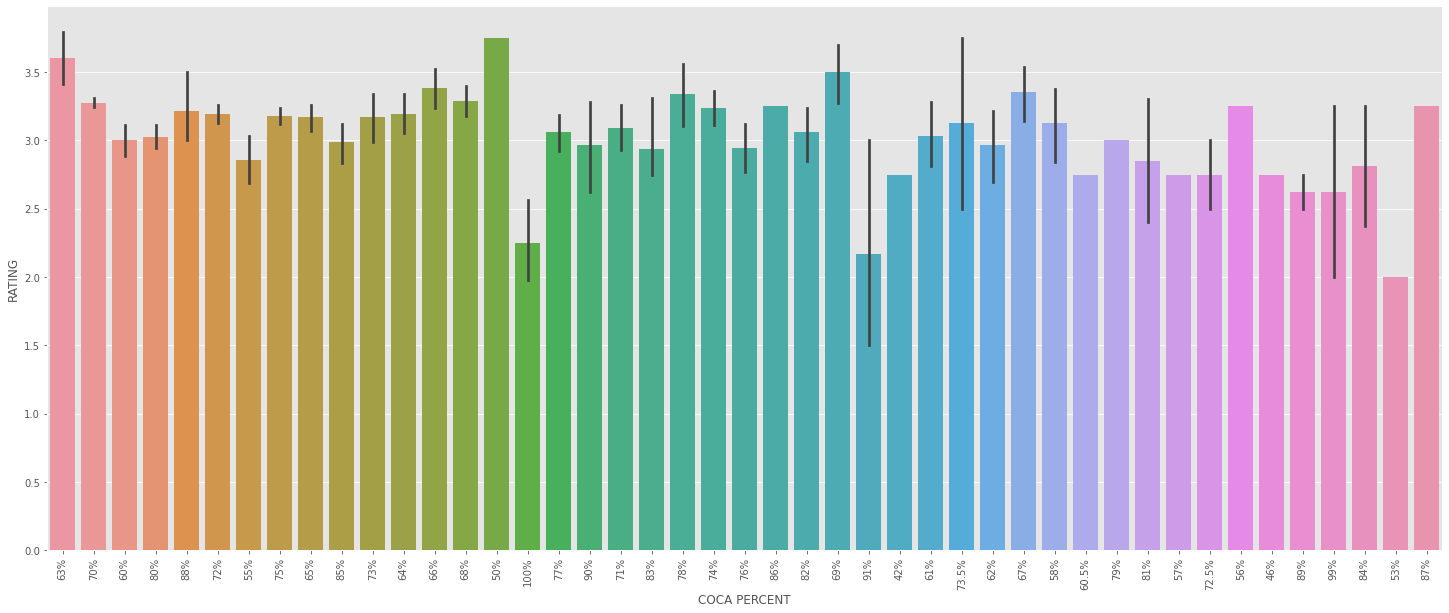

In [11]:
plt.figure(figsize = (25,10))
sns.barplot(x = "Cocoa\nPercent", y = "Rating", data =data)
plt.xticks(rotation='vertical')
plt.xlabel("COCA PERCENT")
plt.ylabel("RATING")
plt.show()

In [12]:
data["REF"].value_counts()

414     10
24       9
387      9
404      9
552      8
        ..
772      1
1003     1
579      1
855      1
853      1
Name: REF, Length: 440, dtype: int64

In [13]:
Ratingperreview = data[["Review\nDate","Rating"]].groupby("Review\nDate").sum()
Ratingperreview.reset_index(inplace = True)
Ratingperreview.head()

,Review\nDate,Rating
0,2006,225.0
1,2007,243.5
2,2008,278.5
3,2009,378.0
4,2010,349.5


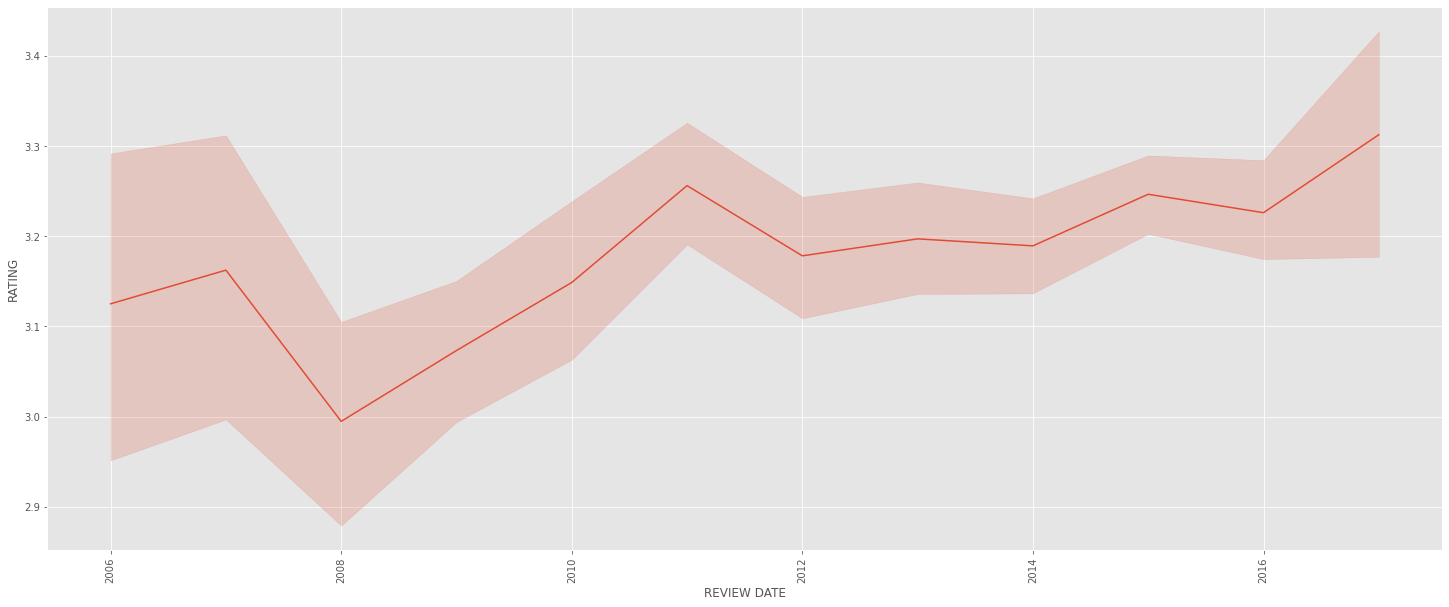

In [14]:
plt.figure(figsize = (25,10))
sns.lineplot(x = "Review\nDate", y = "Rating", data =data)
plt.xticks(rotation='vertical')
plt.xlabel("REVIEW DATE")
plt.ylabel("RATING")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


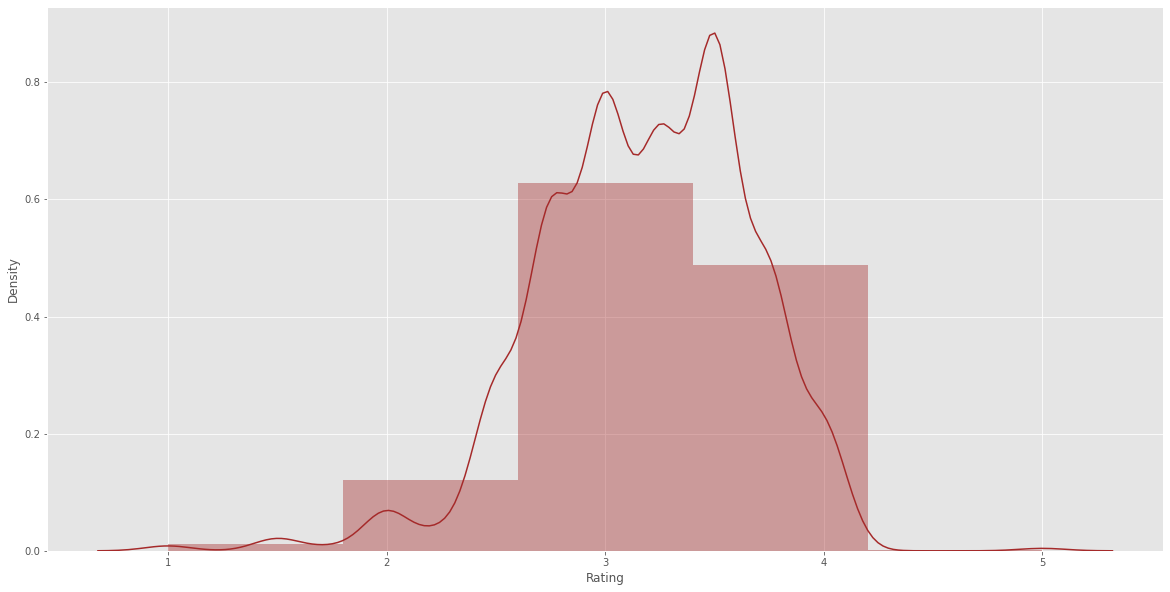

In [15]:
plt.figure(figsize=(20,10))
sns.distplot(data['Rating'],bins=5,color='brown')
plt.show()

__The distribution of the ratings is somewhat skewed from normal. We see that there is a high number of 3 and 4 ratings. There are very few 1 and 5 ratings__

__Extracted the Cocoa percentage and converted it into float for further analysis__

In [16]:
data['Cocoa % as num'] = data['Cocoa\nPercent'].apply(lambda x: x.split('%')[0])

In [17]:
data['Cocoa % as num'].head()

0    63
1    70
2    70
3    70
4    70
Name: Cocoa % as num, dtype: object

In [18]:
data['Cocoa % as num'] = data['Cocoa % as num'].astype(float)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cocoa % as num', ylabel='Density'>

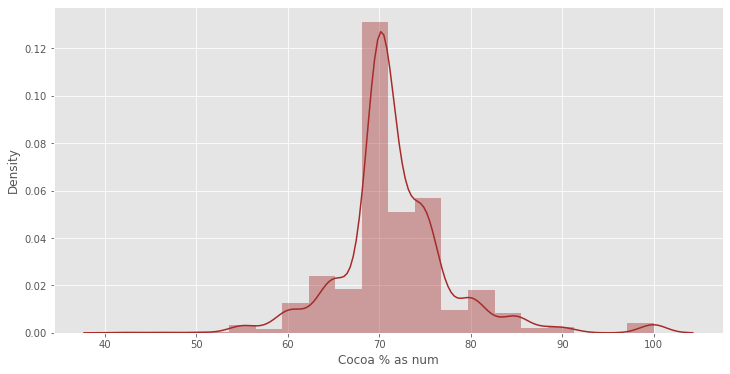

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(data['Cocoa % as num'],bins=20,color='Brown')

## OUTLIER CLASSIFICATION

<AxesSubplot:xlabel='Review\nDate', ylabel='Rating'>

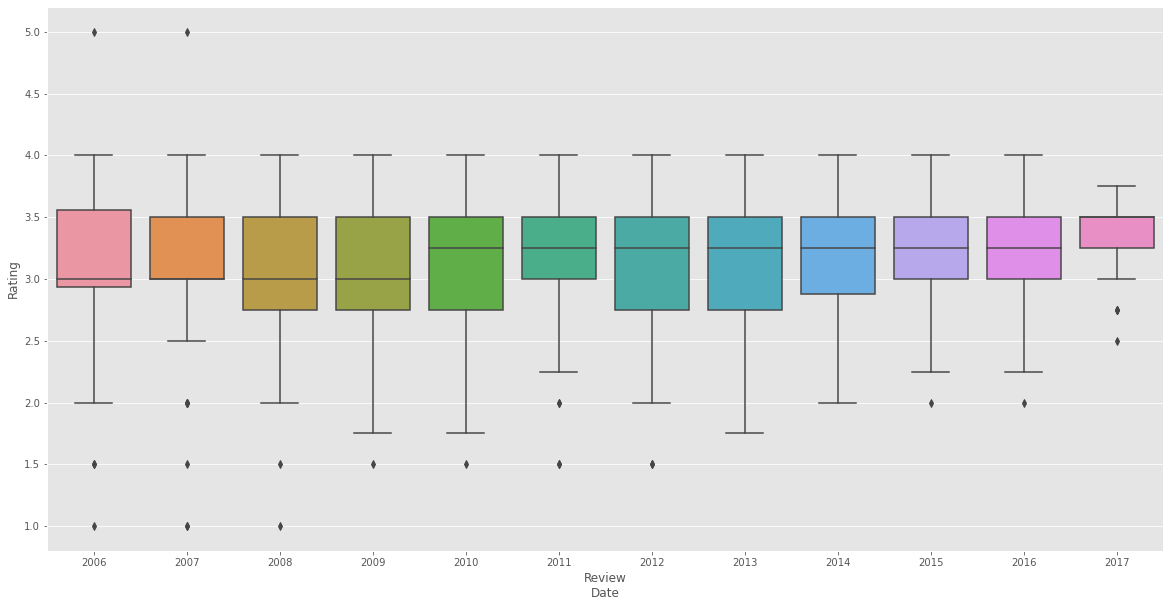

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(x = "Review\nDate",y="Rating",data=data)

__There is an interesting trend in the Rating. From the years 2006 to 2009, the median of the Ratings is consistent around 3. There is a jump in the median to a value of 3.3 from 2010 and it remained around 3.3 until 2016.__

## MEAN MEDIAN CLASSIFICATION

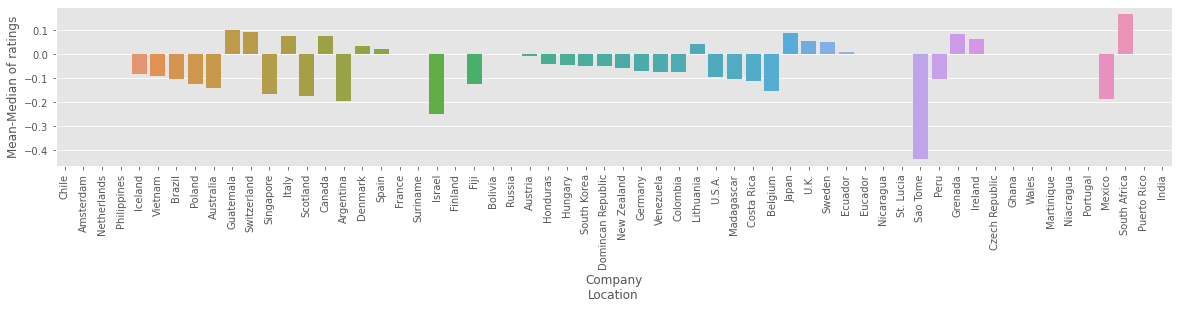

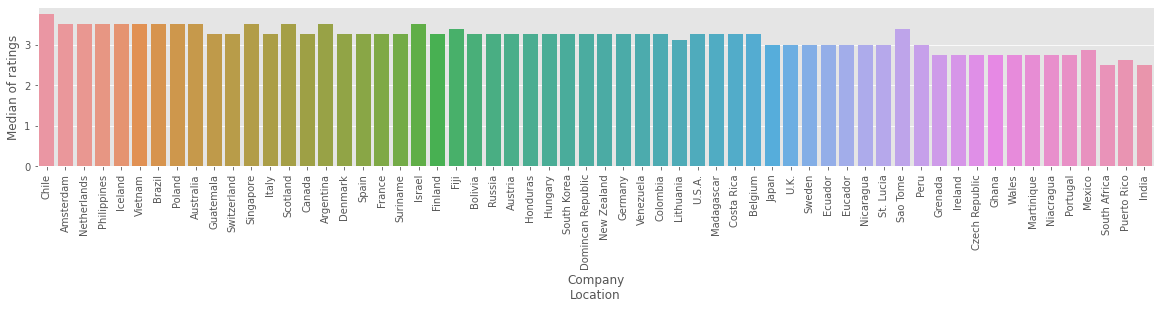

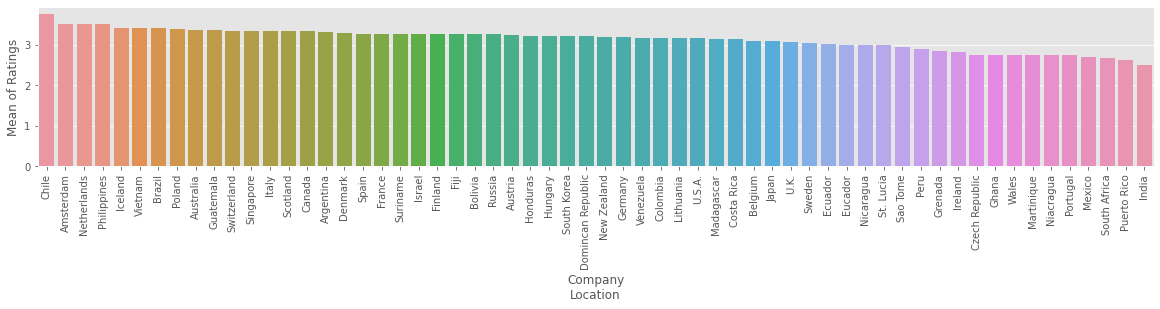

In [21]:
a = data.groupby(['Company\nLocation'])['Rating'].mean()
a = a.sort_values(ascending=False)

b = data.groupby(['Company\nLocation'])['Rating'].median()
b = b.sort_values(ascending=False)

a = pd.DataFrame(a)
b = pd.DataFrame(b)

plt.figure(figsize=(20,10))
plt.subplot(313)

Ratings_by_location = a.join(b, how='left',lsuffix='_mean', rsuffix='_median')
Ratings_by_location['Mean-Median'] = Ratings_by_location['Rating_mean']-Ratings_by_location['Rating_median']
Rating_difference = sns.barplot(x=Ratings_by_location.index,y=Ratings_by_location['Mean-Median'])
Rating_difference.set_xticklabels(labels = Ratings_by_location.index, rotation =90)
Rating_difference.set_ylabel("Mean-Median of ratings")

plt.figure(figsize=(20,10))
plt.subplot(312)
ratings_median = sns.barplot(x = Ratings_by_location.index, y = Ratings_by_location['Rating_median'])
ratings_median.set_xticklabels(labels = Ratings_by_location.index, rotation =90)
ratings_median.set_ylabel("Median of ratings")

plt.figure(figsize=(20,10))
plt.subplot(311)
ratings_mean = sns.barplot(x = Ratings_by_location.index ,y = Ratings_by_location['Rating_mean'])
ratings_mean.set_xticklabels(labels = Ratings_by_location.index, rotation =90)
ratings_mean.set_ylabel("Mean of Ratings")

plt.show()

__From the above visualizations, we can see that there is no much difference between mean and median of the data except for the company that's located in Sao Tome__

__A very important observation is that, Rating seems to be dependent on the country of company location. We can spot several European and South American countries with a higher mean Rating, this could be due to the availability of Cocoa in these countries. The availability cocoa can influence the percentage of Cocoa used in the chocolates at these companies__

__Lets looks at the Cocoa percentage used in Chocolates in different countries. From the below chart, the distribution of cocoa varied from 40% to around 80% in our dataset.__

In [22]:
Ratings_by_location.head()

,Rating_mean,Rating_median,Mean-Median
Company Location,,,
Chile,3.750000,3.75,0.000000
Amsterdam,3.500000,3.50,0.000000
Netherlands,3.500000,3.50,0.000000
Philippines,3.500000,3.50,0.000000
Iceland,3.416667,3.50,-0.083333


In [28]:
CHOCO_PER_COUNTRY = data[["Cocoa % as num","Company\nLocation"]].groupby("Cocoa % as num").sum()
CHOCO_PER_COUNTRY = CHOCO_PER_COUNTRY.reset_index().sort_values(by = "Cocoa % as num",ascending = False)

[Text(0, 0, 'Sao Tome'),
 Text(1, 0, 'Wales'),
 Text(2, 0, 'Ghana'),
 Text(3, 0, 'Ireland'),
 Text(4, 0, 'Portugal'),
 Text(5, 0, 'Eucador'),
 Text(6, 0, 'Niacragua'),
 Text(7, 0, 'Honduras'),
 Text(8, 0, 'Fiji'),
 Text(9, 0, 'Vietnam'),
 Text(10, 0, 'U.K.'),
 Text(11, 0, 'New Zealand'),
 Text(12, 0, 'Argentina'),
 Text(13, 0, 'Amsterdam'),
 Text(14, 0, 'Bolivia'),
 Text(15, 0, 'Scotland'),
 Text(16, 0, 'Germany'),
 Text(17, 0, 'Spain'),
 Text(18, 0, 'Canada'),
 Text(19, 0, 'Ecuador'),
 Text(20, 0, 'Lithuania'),
 Text(21, 0, 'Hungary'),
 Text(22, 0, 'Belgium'),
 Text(23, 0, 'Costa Rica'),
 Text(24, 0, 'Austria'),
 Text(25, 0, 'Nicaragua'),
 Text(26, 0, 'Poland'),
 Text(27, 0, 'Madagascar'),
 Text(28, 0, 'France'),
 Text(29, 0, 'U.S.A.'),
 Text(30, 0, 'Mexico'),
 Text(31, 0, 'Puerto Rico'),
 Text(32, 0, 'Switzerland'),
 Text(33, 0, 'Italy'),
 Text(34, 0, 'Grenada'),
 Text(35, 0, 'Japan'),
 Text(36, 0, 'South Africa'),
 Text(37, 0, 'Singapore'),
 Text(38, 0, 'Israel'),
 Text(39, 0, 'Finl

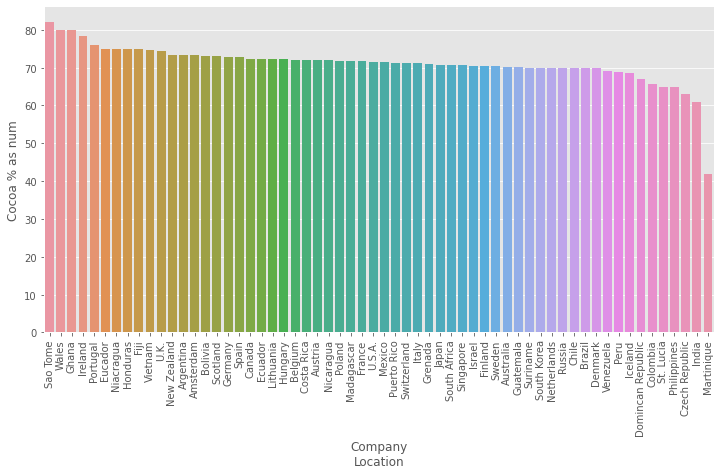

In [31]:
plt.figure(figsize=(12,6))

c = data.groupby(['Company\nLocation'])['Cocoa % as num'].mean()
c = c.sort_values(ascending=False)

ratings = sns.barplot(x=c.index,y=c)
ratings.set_xticklabels(labels = c.index, rotation =90)

__The Ratings might be possibly influenced by the bean type and broad bean type used in the production. Since we have these features in our dataset, we can plot the effect these features have on our ratings.__

__From the below visualizations, we can see that the distribution of ratings is different based on bean type and broad bean type.__

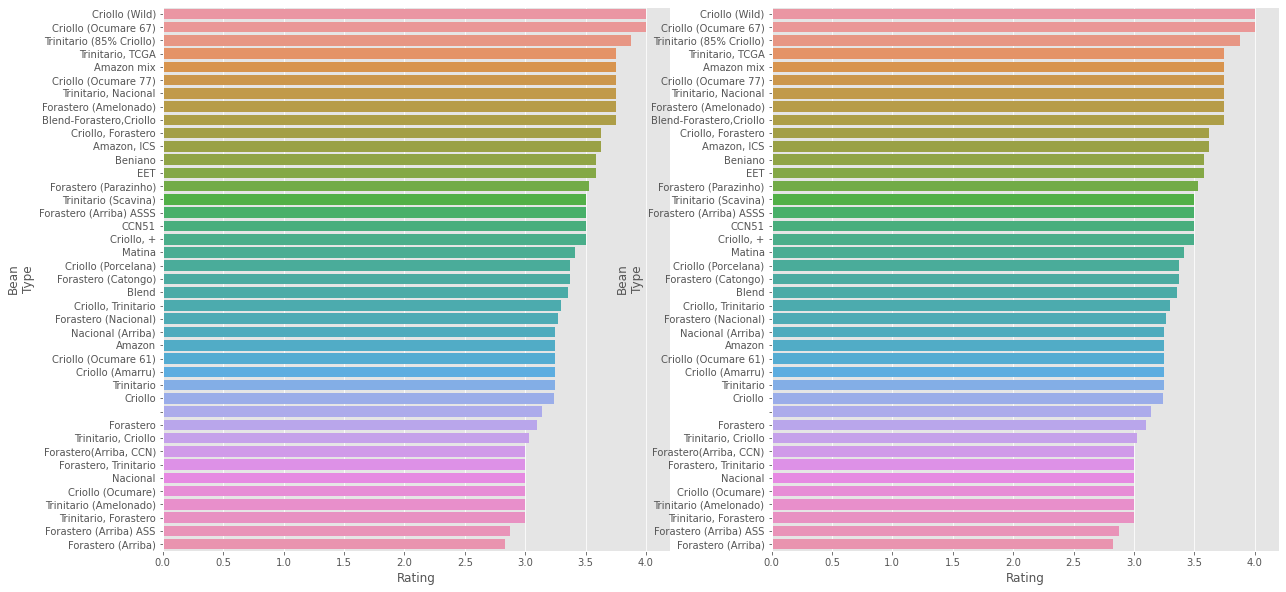

In [34]:
plt.figure(figsize = (20,10))
plt.subplot(121)

e = data.groupby(['Bean\nType'])['Rating'].mean()
e = e.sort_values(ascending=False)
Rating_beanType = sns.barplot(y=e.index,x=e)

plt.subplot(122)
e = data.groupby(['Bean\nType'])['Rating'].mean()
e = e.sort_values(ascending=False)
Rating_beanType = sns.barplot(y=e.index,x=e)
plt.show()

In [39]:
data["Review\nDate"].dtypes

dtype('int64')

In [41]:
data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin,Cocoa % as num
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,63.0
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,70.0
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo,70.0
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo,70.0
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru,70.0


In [46]:
df1 = data[['Cocoa % as num','Rating','Review\nDate']]

In [48]:
for col in data.columns:
    print(data[col].dtypes)

object
object
int64
int64
object
object
float64
object
object
float64


In [49]:
non_numerical_columns = ['Review\nDate']

for i in non_numerical_columns:
    x1 = pd.get_dummies(df1[i])
    df1 = df1.join(x1,lsuffix='_l',rsuffix='_r')
    df1.drop(i,axis=1,inplace=True)

In [51]:
df1.head()

,Cocoa % as num,Rating,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,63.0,3.75,0,0,0,0,0,0,0,0,0,0,1,0
1,70.0,2.75,0,0,0,0,0,0,0,0,0,1,0,0
2,70.0,3.00,0,0,0,0,0,0,0,0,0,1,0,0
3,70.0,3.50,0,0,0,0,0,0,0,0,0,1,0,0
4,70.0,3.50,0,0,0,0,0,0,0,0,0,1,0,0


## CLUSTERING

In [50]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [52]:
df_num = StandardScaler().fit_transform(df1)

In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [4, 5, 6, 7, 8, 9,10, 11, 12, 13]

for num_clusters in range_n_clusters:
    
    db = DBSCAN(eps=0.8, min_samples= num_clusters, metric='euclidean')
    db.fit_predict(df_num)
    cluster_labels =db.labels_
    
    
    # silhouette score
    silhouette_avg = silhouette_score(df_num, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=4, the silhouette score is 0.5931283366665898
For n_clusters=5, the silhouette score is 0.6313826613121095
For n_clusters=6, the silhouette score is 0.6264560137084724
For n_clusters=7, the silhouette score is 0.6227803325136297
For n_clusters=8, the silhouette score is 0.6210562183302176
For n_clusters=9, the silhouette score is 0.613986144404642
For n_clusters=10, the silhouette score is 0.5771258356590139
For n_clusters=11, the silhouette score is 0.5721825233069107
For n_clusters=12, the silhouette score is 0.593975184629116
For n_clusters=13, the silhouette score is 0.5904694844343216


## DBSCAN CLUSTRING

In [57]:
db = DBSCAN(eps=0.8, min_samples= 7, metric='euclidean')
db.fit_predict(df_num)
db

DBSCAN(eps=0.8, min_samples=7)

In [63]:
labels = db.labels_

In [65]:
data["Cluster"] = labels

In [67]:
data["Cluster"].value_counts()

 1     282
 2     240
 0     216
 4     185
 3     169
 5     152
-1     116
 6     115
 7      98
 9      80
 10     65
 11     54
 8      23
Name: Cluster, dtype: int64

-1 stands for outliers/Noise, we see that there are 93 outliers in our dataset.

The number of observations in our clusters range from 20 to 283.

Let's look at some statistics within our clusters.

In [69]:
data_clusters = data.groupby('Cluster')['Rating','Cocoa % as num']
data_clusters.describe()

<ipython-input-69-49c1dd4d616d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_clusters = data.groupby('Cluster')['Rating','Cocoa % as num']


Rating                                                       \
         count      mean       std   min    25%   50%     75%   max   
Cluster                                                               
-1       116.0  2.523707  0.782262  1.00  2.000  2.50  3.0000  5.00   
 0       216.0  3.237269  0.410771  2.25  3.000  3.25  3.5000  4.00   
 1       282.0  3.245567  0.379909  2.00  3.000  3.25  3.5000  4.00   
 2       240.0  3.203125  0.405429  2.25  3.000  3.25  3.5000  4.00   
 3       169.0  3.232249  0.415093  2.25  3.000  3.25  3.5000  4.00   
 4       185.0  3.213514  0.435773  2.25  3.000  3.25  3.5000  4.00   
 5       152.0  3.319079  0.417138  2.50  3.000  3.25  3.5625  4.00   
 6       115.0  3.132609  0.378017  2.50  2.875  3.00  3.5000  4.00   
 7        98.0  3.193878  0.394110  2.25  3.000  3.25  3.5000  4.00   
 8        23.0  3.347826  0.289387  2.75  3.250  3.50  3.5000  3.75   
 9        80.0  3.103125  0.426002  2.50  2.750  3.00  3.5000  4.00   
 10       65.0  3.307692  0.473454  2.50  3.000  3.25  3.7500  4.00   
 11       54.0  3.407407  0.448520  2.50  3.000  3.50  4.0000  4.00   

        Cocoa % as num                                                         
                 count       mean        std   min    25%   50%    75%    max  
Cluster                                                                        
-1               116.0  77.129310  15.988327  42.0  63.75  75.0  90.00  100.0  
 0               216.0  71.587963   5.005266  60.0  70.00  70.0  75.00   90.0  
 1               282.0  71.847518   4.696650  57.0  70.00  70.0  75.00   88.0  
 2               240.0  72.193750   4.388670  60.0  70.00  70.0  75.00   88.0  
 3               169.0  70.828402   4.978539  55.0  70.00  70.0  74.00   85.0  
 4               185.0  71.043243   4.438991  58.0  70.00  70.0  72.00   85.0  
 5               152.0  70.828947   4.382047  56.0  70.00  70.0  73.00   85.0  
 6               115.0  69.813043   6.069936  55.0  66.50  70.0  75.00   85.0  
 7                98.0  71.219388   4.182109  60.0  70.00  71.0  74.75   82.0  
 8                23.0  71.608696   2.742579  70.0  70.00  70.0  72.50   80.0  
 9                80.0  72.312500   5.711622  60.0  70.00  70.5  75.00   88.0  
 10               65.0  70.107692   4.224642  60.0  67.00  70.0  73.00   77.0  
 11               54.0  70.833333   4.745405  60.0  66.25  72.0  75.00   80.0

## PLOT FOR CLUSTER

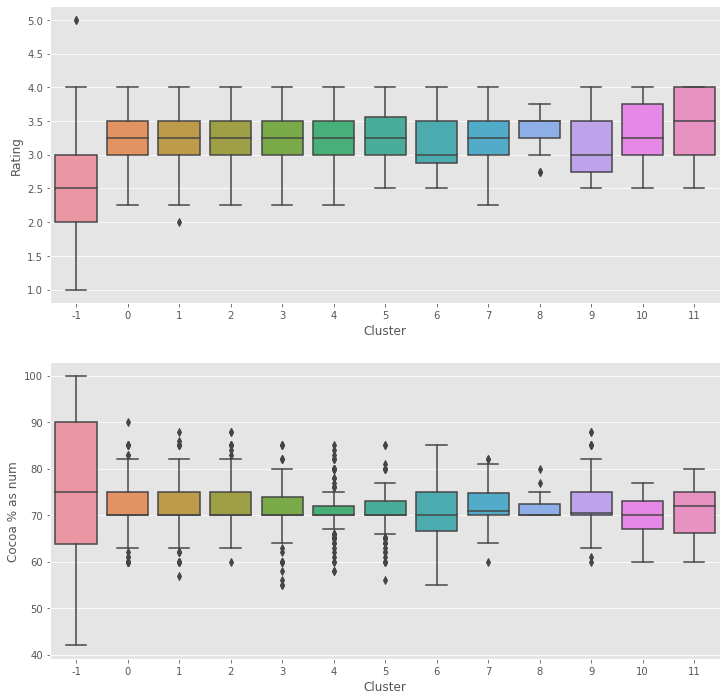

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [70]:
fig, (ax1,ax2) = plt.subplots(nrows = 2,figsize=(12,12))

plt.figure(figsize=(12,8))
plot1 = sns.boxplot(x=data['Cluster'],y=data['Rating'],data=data, ax = ax1)


plt.figure(figsize=(12,8))
plot2 = sns.boxplot(x=data['Cluster'],y=data['Cocoa % as num'],data=data, ax= ax2)

__We can infer from the above plots that the rating as well as the Cocoa percentage is much different for our outliers from the remaining clusters within the dataset__

__A high Cocoa percentage in a chocolate doesn't necessarily prompt higher ratings, looks like it actually worsens the ratings from our dataset__

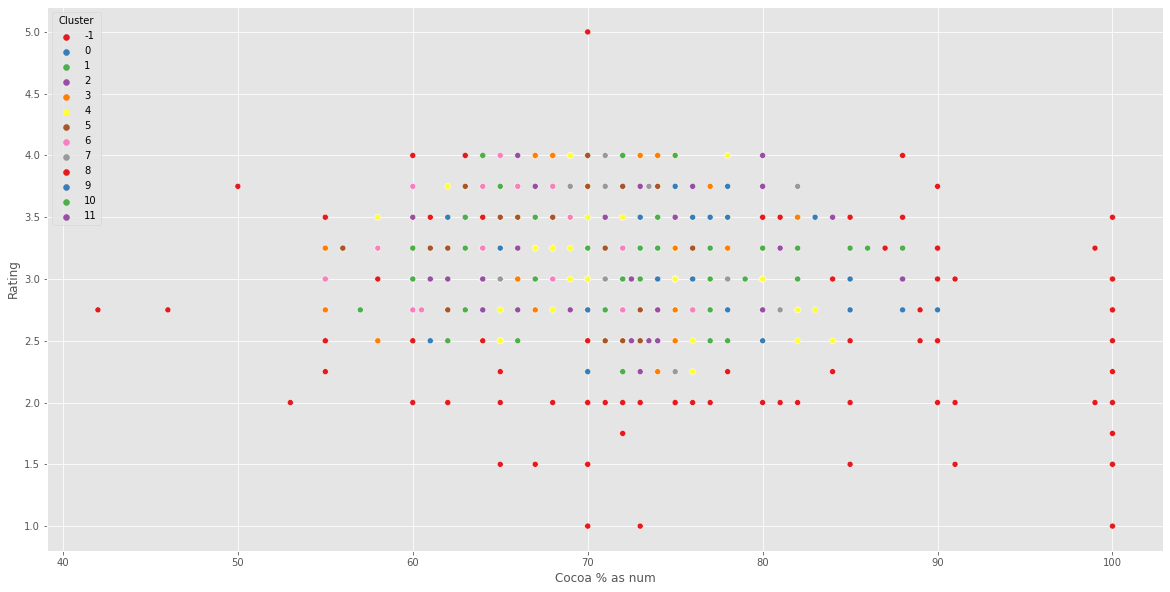

In [73]:
plt.figure(figsize =(20,10))
sns.scatterplot( x = 'Cocoa % as num',y = 'Rating',hue='Cluster',data = data,legend='full',palette="Set1")
plt.show()

__The big advantage of using DBSCAN is we can easily identify outliears__

# ***THE END !!***

## HAPPY CODING 😎😎